In [3]:
import dataio

In [4]:
table =  dataio.n_rows_parquet("./movies-3k.parquet", 15)

In [6]:
df = table.to_pandas()
df.sort_values(by=['IMDB_Rating'])[["IMDB_Rating", "Rotten_Tomatoes_Rating"]]

,IMDB_Rating,Rotten_Tomatoes_Rating
4,3.4,62.0
7,3.8,NaN
8,5.8,25.0
0,6.1,NaN
2,6.8,NaN
14,6.8,87.0
1,6.9,NaN
9,7.0,86.0
10,7.0,81.0
11,7.5,84.0


<Axes: >

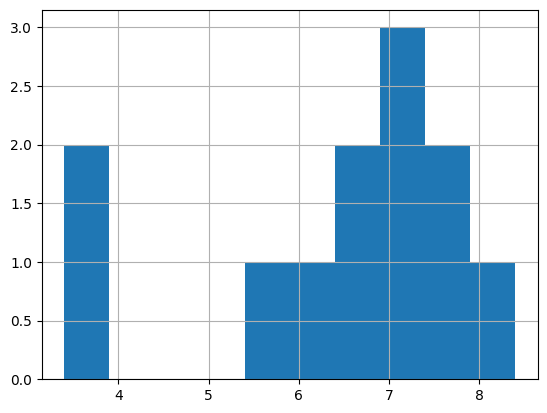

In [8]:
# why is it that between 6-7 IMDB rating, the rotten tomatoes for 0s goes higher than total?
# I suspect a weird bug with counting Null values
df[df["IMDB_Rating"].notna()]["IMDB_Rating"].hist()

In [9]:
table =  dataio.n_rows_parquet("./movies-3k.parquet", 3201)

In [10]:
df = table.to_pandas()

In [11]:
limited = df[df["IMDB_Rating"].notna() & df["Rotten_Tomatoes_Rating"].notna()][:15]

In [12]:
limited

,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
4,1009819.0,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
8,1641825.0,6341825.0,NaN,40000000.0,1-Jul-86,R,NaN,None,None,None,None,Roman Polanski,25.0,5.8,3275.0
9,20400000.0,20400000.0,NaN,6000000.0,31-Dec-46,None,NaN,None,None,None,None,None,86.0,7.0,2906.0
10,37600000.0,37600000.0,NaN,1000000.0,7-Oct-63,None,NaN,None,None,None,None,None,81.0,7.0,4035.0
11,37402877.0,37402877.0,NaN,10000000.0,11-Dec-68,None,NaN,Sony Pictures,None,Musical,None,None,84.0,7.5,9111.0
12,13129846.0,13129846.0,NaN,2000000.0,25-Dec-62,None,NaN,Universal,None,None,None,None,97.0,8.4,82786.0
14,5228617.0,5228617.0,NaN,100000.0,1-Mar-87,None,NaN,None,None,None,None,None,87.0,6.8,1532.0
18,80000000.0,80000000.0,NaN,13500000.0,5-Oct-56,None,NaN,None,None,None,None,None,90.0,2.5,1677.0
21,0.0,0.0,NaN,4000000.0,9-Nov-72,PG,NaN,Sony/Columbia,Based on Play,Drama,Historical Fiction,None,57.0,7.0,4099.0
22,34175000.0,94875000.0,NaN,32000000.0,14-Dec-79,None,NaN,Universal,Original Screenplay,Comedy,Historical Fiction,Steven Spielberg,33.0,5.6,13364.0


In [13]:
import pyarrow as pa
table = pa.Table.from_pandas(limited)

In [14]:
dataio.table_to_arrow_file(table, "limited.arrow")
dataio.table_to_parquet_file(table, "limited.parquet")